https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score,classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.head().transpose()

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


most of the data here is categorical, so we cannot see statisitical info like mean , median and mode but we can see 
how often odour shows up per class

The target is categorical column- it is classification problem

## EDA

<AxesSubplot:xlabel='class', ylabel='count'>

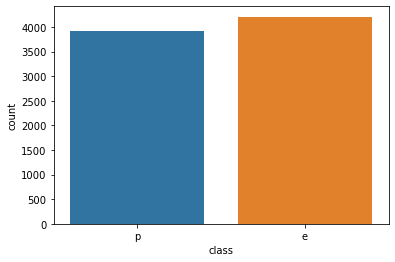

In [5]:
sns.countplot(data=df,x='class')

There is class imbalance issue

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
feature_Info=df.describe().transpose().reset_index().sort_values('unique')
feature_Info

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


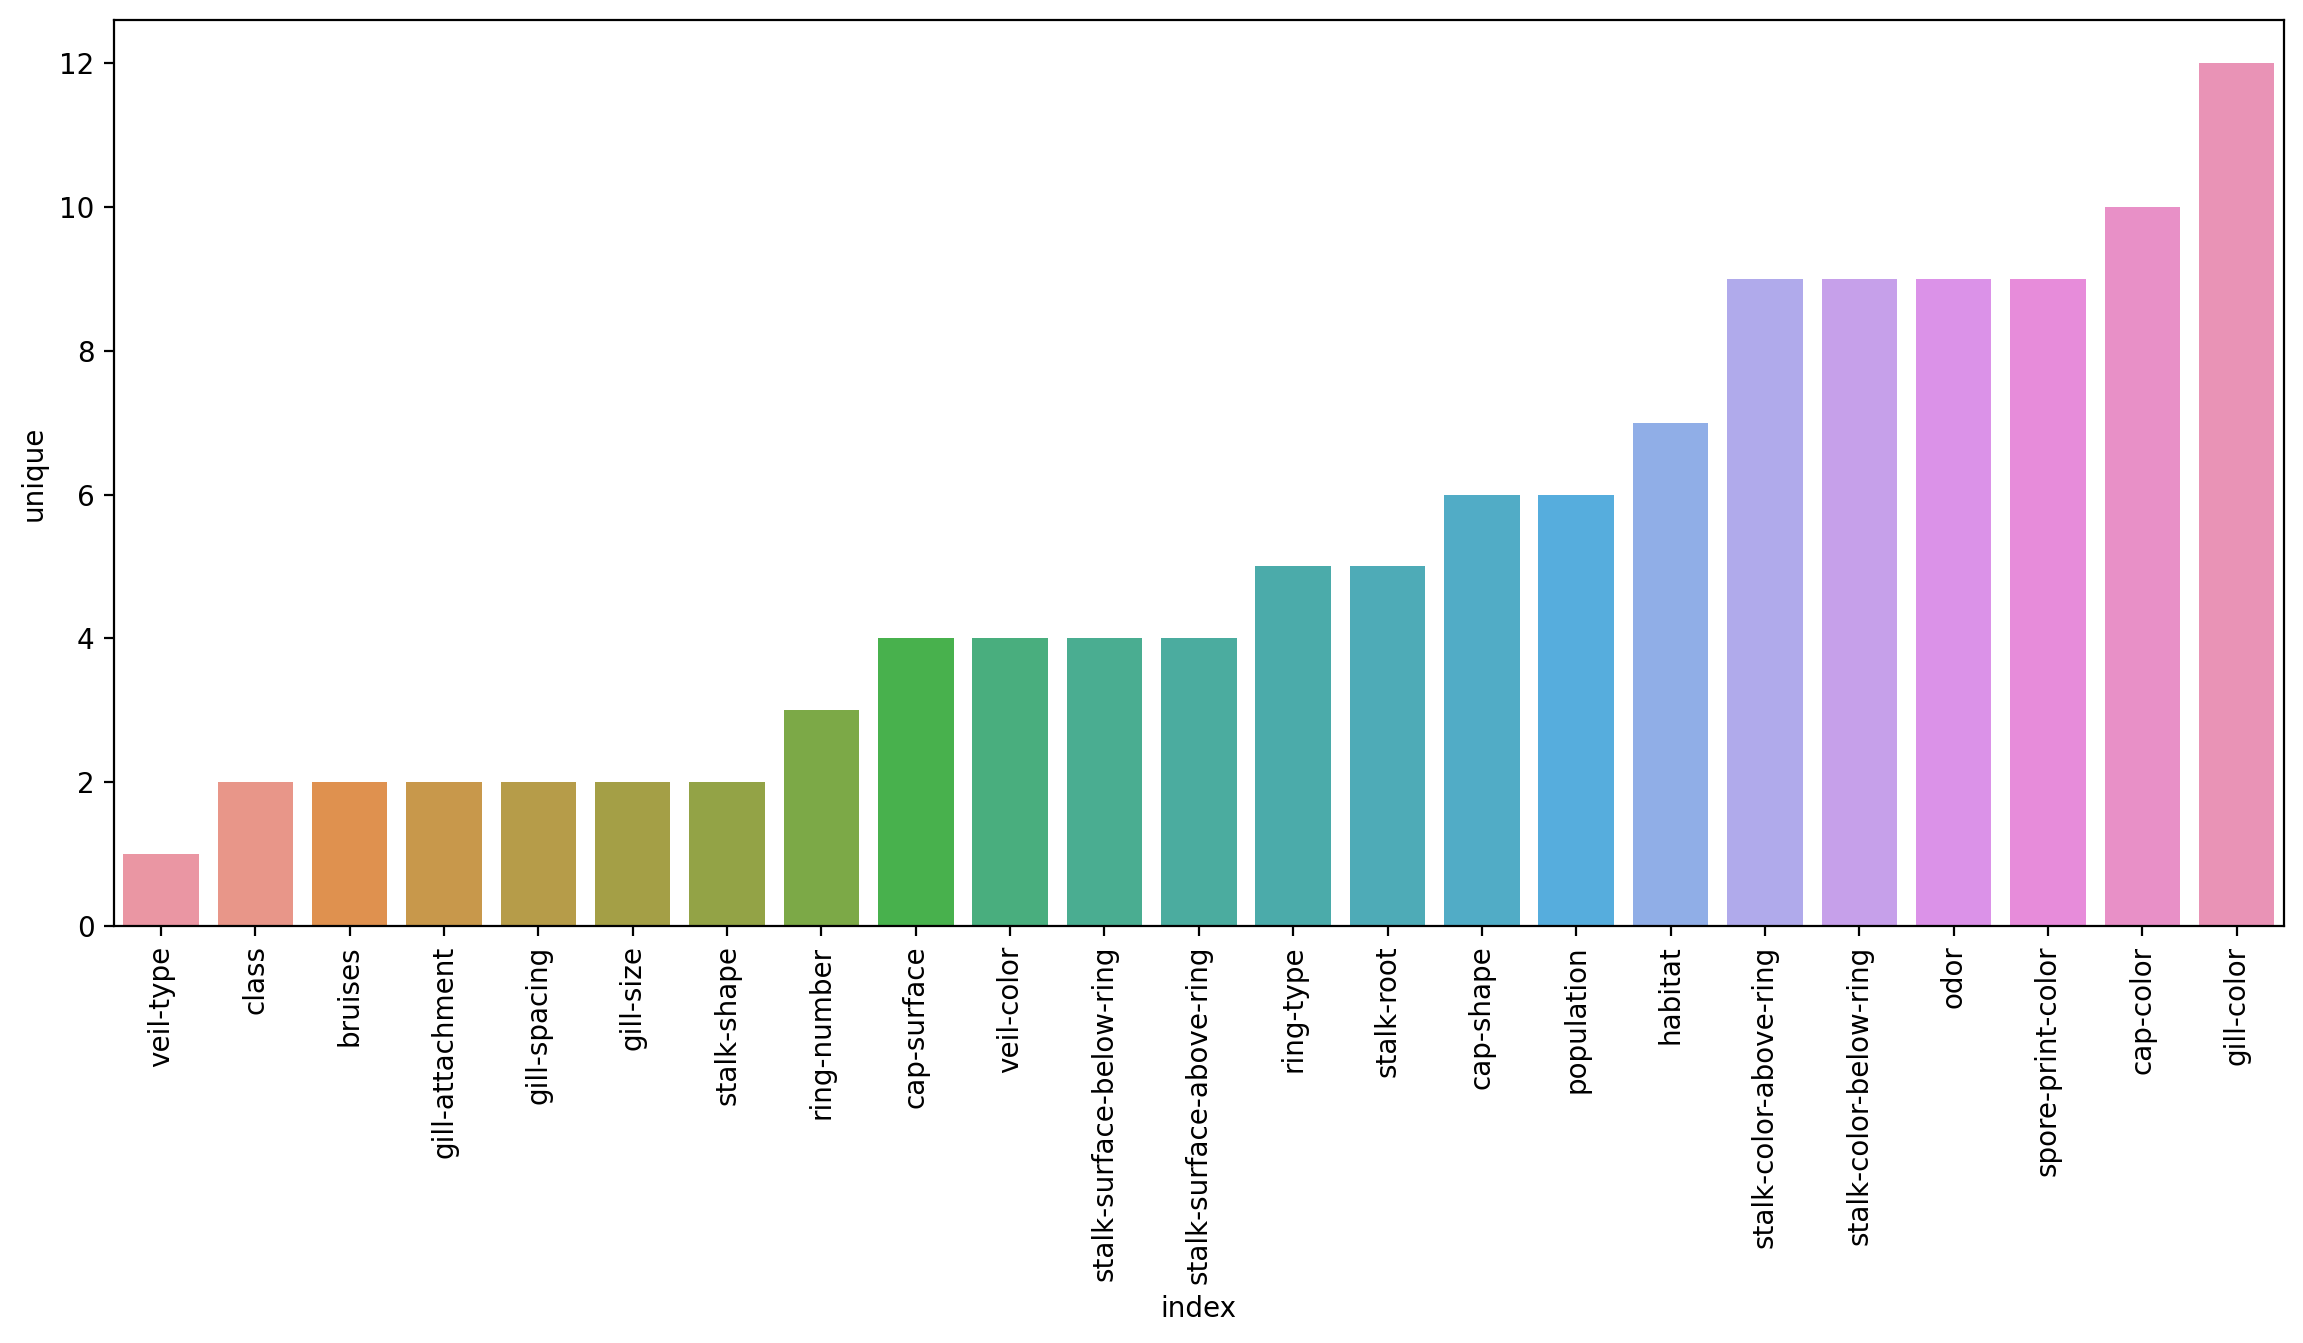

In [9]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feature_Info,x='index',y='unique')
plt.xticks(rotation=90);

creating a barplot for number of unique values for each feature.

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No missing values in the data

## Encoding

In [11]:
X = df.drop('class',axis=1)

In [12]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [13]:
X = pd.get_dummies(X,drop_first=True)
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [14]:
y = df['class']

### PCA

In [15]:
explained_variance = []

for n in range(1,95):
    pca = PCA(n_components=n)
    pca.fit(X)
    
    explained_variance.append((np.sum(pca.explained_variance_ratio_)*100))

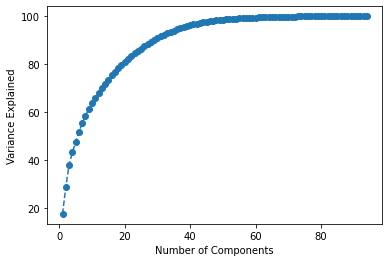

In [16]:
plt.plot(range(1,95),explained_variance,'o--')
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

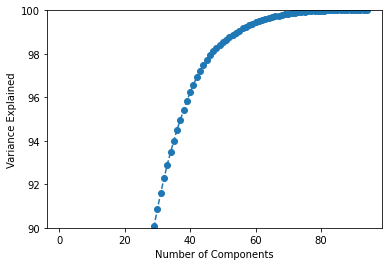

In [17]:
plt.ylim(90,100)
plt.plot(range(1,95),explained_variance,'o--')
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [18]:
explained_variance[29]

90.88508777796628

30 components can explain 90.8% of variance

In [19]:
pca = PCA(n_components=30)
x_pca=pca.fit_transform(X)

In [20]:
x_pca.shape

(8124, 30)

## identifying the best random state

In [21]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.9985080193957478 on random state 163


 best accuracy is 99.85 and random state is 163

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=163)


In [23]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
pred=DTC.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1374
           p       1.00      1.00      1.00      1307

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [24]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
pred=RFC.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1374
           p       1.00      1.00      1.00      1307

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [25]:
svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1374
           p       1.00      1.00      1.00      1307

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [26]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
pred=ada.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       0.99      0.99      0.99      1374
           p       0.99      0.99      0.99      1307

    accuracy                           0.99      2681
   macro avg       0.99      0.99      0.99      2681
weighted avg       0.99      0.99      0.99      2681



In [27]:
cross_val_score(DTC,x_pca,y,cv=5).mean()

0.8966910951117848

In [28]:
cross_val_score(RFC,x_pca,y,cv=5).mean()

0.8712086396362257

In [29]:
cross_val_score(svc,x_pca,y,cv=5).mean()

0.8681252747252748

In [30]:
cross_val_score(ada,x_pca,y,cv=5).mean()

0.88598757104964

In [35]:
DTC=1-0.8966910951117848
DTC

0.1033089048882152

In [37]:
ADAB=1-0.88598757104964
ADAB

0.11401242895036001

DTC is the best method, as the difference between the accuracy and cross val score is less

## Hyper Parameter Tuning

In [46]:
parameter_grid={'max_depth':np.arange(2,10),
          'criterion':['gini','entropy'],
          'splitter':['best','random'],
           'max_features':['auto','sqrt','log2']
          }

In [47]:
gcv=GridSearchCV(DecisionTreeClassifier(),parameter_grid,cv=5)

In [48]:
gcv.fit(x_pca, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [49]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [50]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features='log2')

## Training with best params

In [61]:
Final_model=DecisionTreeClassifier(criterion='gini',max_depth=6,max_features='log2',splitter='best')
Final_model.fit(X_train,y_train)
pred=Final_model.predict(X_test)
accuracyScore=accuracy_score(y_test,pred)
print(accuracyScore)

0.9798582618425961


Accuracy achieved on test set is 97.9% percentage

## saving the model


In [79]:
import joblib
joblib.dump(Final_model,"Final_model.pkl")

['Final_model.pkl']